In [6]:
import time
import pickle
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import random
random.seed(0)

## Embedding visualization TSNE

In [65]:
code_array = ['J181', 'N390', 'S7200', 'I639', 'J189', 'R296', 'A419', 'N179', 'F03X',
       'I500']

In [66]:
# Horizental embedding
horiz_model = Word2Vec.load("models/diag2vec_1_150.pkl")

In [69]:
for code in code_array:
    print(horiz_model.most_similar(code))
    print('--------------------------')

[('J189', 0.8781819343566895), ('J22X', 0.6534386873245239), ('J677', 0.6291916370391846), ('J156', 0.6275858879089355), ('J180', 0.6198903918266296), ('J151', 0.610002338886261), ('D528', 0.6028205156326294), ('B829', 0.5988494157791138), ('J189+', 0.5982365012168884), ('I430', 0.595518171787262)]
--------------------------
[('F980', 0.6710264682769775), ('A418+', 0.6459859609603882), ('M6295', 0.6027185916900635), ('N160', 0.6015061140060425), ('L26X', 0.5993092060089111), ('M4633', 0.5988706350326538), ('J9610', 0.5965715050697327), ('N431', 0.5954725742340088), ('N160*', 0.5928492546081543), ('J09X', 0.5916386842727661)]
--------------------------
[('S7210', 0.6963902711868286), ('S7230', 0.5953357219696045), ('Y831', 0.5889308452606201), ('F318+', 0.5675269961357117), ('S8281', 0.5624414682388306), ('S328', 0.5551403164863586), ('S5251', 0.5547195672988892), ('S7220', 0.5523556470870972), ('S721', 0.5485526919364929), ('M2526', 0.5484314560890198)]
--------------------------
[('I6

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


In [11]:
horiz_model.wv.most_similar(['R296'])#

[(u'M2468', 0.6462290287017822),
 (u'G411', 0.6312623620033264),
 (u'Y743', 0.6290975213050842),
 (u'Y357', 0.6111089587211609),
 (u'F317', 0.6090216040611267),
 (u'G039+', 0.6075626611709595),
 (u'W511', 0.6004699468612671),
 (u'F019*', 0.5986306667327881),
 (u'F050*', 0.5949487686157227),
 (u'W201', 0.5915811061859131)]

In [55]:
def tsne_plot(model, vocabs):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []
    
    for word in vocabs:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=5, n_components=2, init='pca', n_iter=2000, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(12, 12)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [23]:
# Plot the most similar diagnoses of each primary diagnose of Dtoc
def top_similar_vacabs(model, diags):

    top_similarities = []

    for diag in diags:
        sims = model.most_similar(diag)
        for sim in sims:
            top_similarities.append(sim[0])

    vocabs = diags+top_similarities
    return vocabs

In [52]:
keys = random.sample(horiz_model.wv.index2word, 200)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


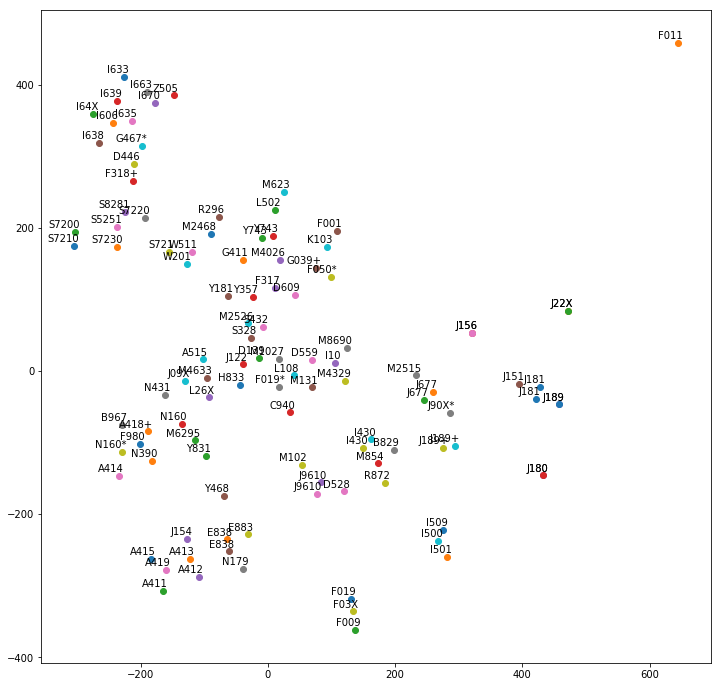

In [62]:
vocabs = top_similar_vacabs(horiz_model, ['J181', 'N390', 'S7200', 'I639', 'J189', 'R296', 'A419', 'N179', 'F03X',
           'I500'])

# keys.remove('N419')
tsne_plot(horiz_model, vocabs)

In [59]:
# Longitutional embedding
longi_model = Word2Vec.load("models/seq2vec_1_150.pkl")

In [92]:
for code in code_array:
    print longi_model.most_similar(code)
    print '--------------------------'

[(u'S2720', 0.7052844166755676), (u'E169', 0.7010078430175781), (u'R090', 0.6917665004730225), (u'J432', 0.688801109790802), (u'J9601', 0.6852083206176758), (u'S212', 0.6813784837722778), (u'M102', 0.6812260746955872), (u'N430', 0.6806085109710693), (u'G211', 0.6803620457649231), (u'J154', 0.6794084906578064)]
--------------------------
[(u'T013', 0.6869652271270752), (u'Z768', 0.675707995891571), (u'S1200', 0.668476939201355), (u'E781', 0.6623339653015137), (u'S003', 0.6591904759407043), (u'E240', 0.6517189741134644), (u'Z118', 0.6514281034469604), (u'S534', 0.6474083662033081), (u'I616', 0.6440455317497253), (u'A414', 0.6362167000770569)]
--------------------------
[(u'G308+', 0.6925579905509949), (u'F002*', 0.686058759689331), (u'M8090', 0.675950825214386), (u'S2230', 0.675692617893219), (u'S4230', 0.6743737459182739), (u'I443', 0.6706977486610413), (u'S208', 0.6667928099632263), (u'S1210', 0.6667711734771729), (u'S220', 0.666660726070404), (u'M809', 0.661830484867096)]
------------

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  after removing the cwd from sys.path.


In [60]:
keys = random.sample(longi_model.wv.index2word, 200)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


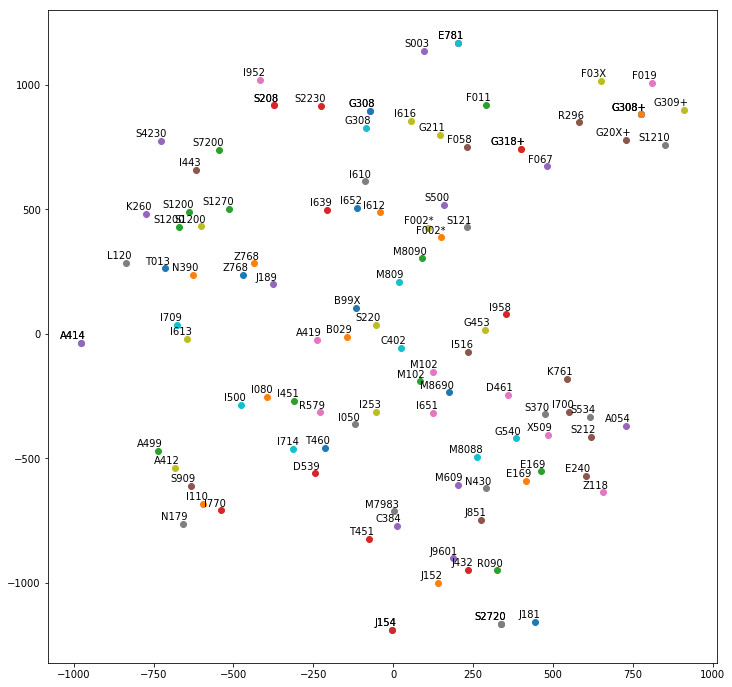

In [63]:
vocabs = top_similar_vacabs(longi_model, ['J181', 'N390', 'S7200', 'I639', 'J189', 'R296', 'A419', 'N179', 'F03X',
           'I500'])
tsne_plot(longi_model, vocabs)

## ROC-AUC curve

## 1. EMB-dim = 150

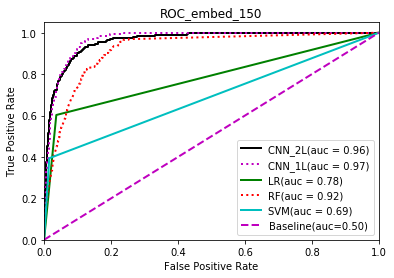

In [3]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import _pickle as pickle

roc_CNN = pickle.load(open('dataset/roc_CNN_150.pkl', 'rb'))
fpr_CNN, tpr_CNN = roc_CNN['fpr'].values,roc_CNN['tpr'].values

roc_CNN_1L = pickle.load(open('dataset/roc_CNN_150_1L.pkl', 'rb'))
fpr_CNN_1L, tpr_CNN_1L = roc_CNN_1L['fpr'].values,roc_CNN_1L['tpr'].values

roc_LR = pickle.load(open('dataset/roc_LR_150.pkl', 'rb'))
fpr_LR, tpr_LR = roc_LR['fpr'].values,roc_LR['tpr'].values

roc_RF = pickle.load(open('dataset/roc_RF_150.pkl', 'rb'))
fpr_RF, tpr_RF = roc_RF['fpr'].values,roc_RF['tpr'].values

roc_SVM = pickle.load(open('dataset/roc_SVM_150.pkl', 'rb'))
fpr_SVM, tpr_SVM = roc_SVM['fpr'].values,roc_SVM['tpr'].values




plt.figure()
plt.plot(fpr_CNN, tpr_CNN, color='k',
        lw=2.0,  label='CNN_2L(auc = %0.2f)' % auc(fpr_CNN, tpr_CNN))
plt.plot(fpr_CNN_1L, tpr_CNN_1L, color='m',
        lw=2.0 , ls=':',  label='CNN_1L(auc = %0.2f)' % auc(fpr_CNN_1L, tpr_CNN_1L))
plt.plot(fpr_LR, tpr_LR, color='g',
        lw=2.0, label='LR(auc = %0.2f)' % auc(fpr_LR, tpr_LR))
plt.plot(fpr_RF, tpr_RF, color='r',
        lw=2.0, ls=':',  label='RF(auc = %0.2f)' % auc(fpr_RF, tpr_RF))
plt.plot(fpr_SVM, tpr_SVM, color='c',
        lw=2.0 ,label='SVM(auc = %0.2f)' % auc(fpr_SVM, tpr_SVM))

plt.plot([0, 1], [0, 1], color='m', lw=2.0, linestyle='--', label='Baseline(auc=0.50)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_embed_150')
plt.legend(loc="lower right")
plt.show()

In [ ]:
## 2. EMB-dim = 100

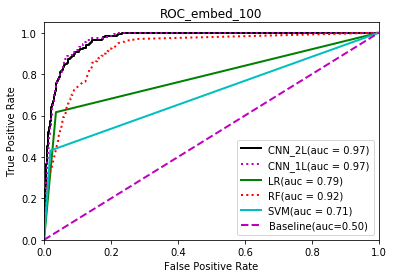

In [4]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import _pickle as pickle

roc_CNN = pickle.load(open('dataset/roc_CNN_100.pkl', 'rb'))
fpr_CNN, tpr_CNN = roc_CNN['fpr'].values,roc_CNN['tpr'].values

roc_CNN_1L = pickle.load(open('dataset/roc_CNN_100_1L.pkl', 'rb'))
fpr_CNN_1L, tpr_CNN_1L = roc_CNN_1L['fpr'].values,roc_CNN_1L['tpr'].values

roc_LR = pickle.load(open('dataset/roc_LR_100.pkl', 'rb'))
fpr_LR, tpr_LR = roc_LR['fpr'].values,roc_LR['tpr'].values

roc_RF = pickle.load(open('dataset/roc_RF_100.pkl', 'rb'))
fpr_RF, tpr_RF = roc_RF['fpr'].values,roc_RF['tpr'].values

roc_SVM = pickle.load(open('dataset/roc_SVM_100.pkl', 'rb'))
fpr_SVM, tpr_SVM = roc_SVM['fpr'].values,roc_SVM['tpr'].values




plt.figure()
plt.plot(fpr_CNN, tpr_CNN, color='k',
        lw=2.0,  label='CNN_2L(auc = %0.2f)' % auc(fpr_CNN, tpr_CNN))
plt.plot(fpr_CNN_1L, tpr_CNN_1L, color='m',
        lw=2.0 , ls=':',  label='CNN_1L(auc = %0.2f)' % auc(fpr_CNN_1L, tpr_CNN_1L))
plt.plot(fpr_LR, tpr_LR, color='g',
        lw=2.0, label='LR(auc = %0.2f)' % auc(fpr_LR, tpr_LR))
plt.plot(fpr_RF, tpr_RF, color='r',
        lw=2.0, ls=':',  label='RF(auc = %0.2f)' % auc(fpr_RF, tpr_RF))
plt.plot(fpr_SVM, tpr_SVM, color='c',
        lw=2.0 ,label='SVM(auc = %0.2f)' % auc(fpr_SVM, tpr_SVM))

plt.plot([0, 1], [0, 1], color='m', lw=2.0, linestyle='--', label='Baseline(auc=0.50)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_embed_100')
plt.legend(loc="lower right")
plt.show()

## EMB-dim = 200

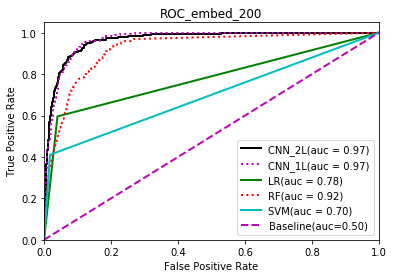

In [5]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import _pickle as pickle

roc_CNN = pickle.load(open('dataset/roc_CNN_200.pkl', 'rb'))
fpr_CNN, tpr_CNN = roc_CNN['fpr'].values,roc_CNN['tpr'].values

roc_CNN_1L = pickle.load(open('dataset/roc_CNN_200_1L.pkl', 'rb'))
fpr_CNN_1L, tpr_CNN_1L = roc_CNN_1L['fpr'].values,roc_CNN_1L['tpr'].values

roc_LR = pickle.load(open('dataset/roc_LR_200.pkl', 'rb'))
fpr_LR, tpr_LR = roc_LR['fpr'].values,roc_LR['tpr'].values

roc_RF = pickle.load(open('dataset/roc_RF_200.pkl', 'rb'))
fpr_RF, tpr_RF = roc_RF['fpr'].values,roc_RF['tpr'].values

roc_SVM = pickle.load(open('dataset/roc_SVM_200.pkl', 'rb'))
fpr_SVM, tpr_SVM = roc_SVM['fpr'].values,roc_SVM['tpr'].values




plt.figure()
plt.plot(fpr_CNN, tpr_CNN, color='k',
        lw=2.0,  label='CNN_2L(auc = %0.2f)' % auc(fpr_CNN, tpr_CNN))
plt.plot(fpr_CNN_1L, tpr_CNN_1L, color='m',
        lw=2.0 , ls=':',  label='CNN_1L(auc = %0.2f)' % auc(fpr_CNN_1L, tpr_CNN_1L))
plt.plot(fpr_LR, tpr_LR, color='g',
        lw=2.0, label='LR(auc = %0.2f)' % auc(fpr_LR, tpr_LR))
plt.plot(fpr_RF, tpr_RF, color='r',
        lw=2.0, ls=':',  label='RF(auc = %0.2f)' % auc(fpr_RF, tpr_RF))
plt.plot(fpr_SVM, tpr_SVM, color='c',
        lw=2.0 ,label='SVM(auc = %0.2f)' % auc(fpr_SVM, tpr_SVM))

plt.plot([0, 1], [0, 1], color='m', lw=2.0, linestyle='--', label='Baseline(auc=0.50)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_embed_200')
plt.legend(loc="lower right")
plt.show()

EMB-dim = 50

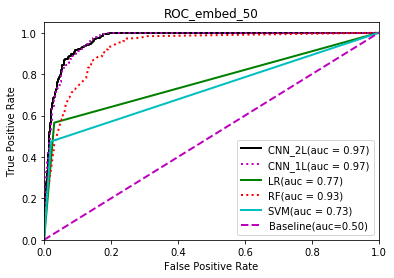

In [2]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import _pickle as pickle

roc_CNN = pickle.load(open('dataset/roc_CNN_50.pkl', 'rb'))
fpr_CNN, tpr_CNN = roc_CNN['fpr'].values,roc_CNN['tpr'].values

roc_CNN_1L = pickle.load(open('dataset/roc_CNN_50_1L.pkl', 'rb'))
fpr_CNN_1L, tpr_CNN_1L = roc_CNN_1L['fpr'].values,roc_CNN_1L['tpr'].values

roc_LR = pickle.load(open('dataset/roc_LR_50.pkl', 'rb'))
fpr_LR, tpr_LR = roc_LR['fpr'].values,roc_LR['tpr'].values

roc_RF = pickle.load(open('dataset/roc_RF_50.pkl', 'rb'))
fpr_RF, tpr_RF = roc_RF['fpr'].values,roc_RF['tpr'].values

roc_SVM = pickle.load(open('dataset/roc_SVM_50.pkl', 'rb'))
fpr_SVM, tpr_SVM = roc_SVM['fpr'].values,roc_SVM['tpr'].values




plt.figure()
plt.plot(fpr_CNN, tpr_CNN, color='k',
        lw=2.0,  label='CNN_2L(auc = %0.2f)' % auc(fpr_CNN, tpr_CNN))
plt.plot(fpr_CNN_1L, tpr_CNN_1L, color='m',
        lw=2.0 , ls=':',  label='CNN_1L(auc = %0.2f)' % auc(fpr_CNN_1L, tpr_CNN_1L))
plt.plot(fpr_LR, tpr_LR, color='g',
        lw=2.0, label='LR(auc = %0.2f)' % auc(fpr_LR, tpr_LR))
plt.plot(fpr_RF, tpr_RF, color='r',
        lw=2.0, ls=':',  label='RF(auc = %0.2f)' % auc(fpr_RF, tpr_RF))
plt.plot(fpr_SVM, tpr_SVM, color='c',
        lw=2.0 ,label='SVM(auc = %0.2f)' % auc(fpr_SVM, tpr_SVM))

plt.plot([0, 1], [0, 1], color='m', lw=2.0, linestyle='--', label='Baseline(auc=0.50)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_embed_50')
plt.legend(loc="lower right")
plt.show()